# DSE 2262 MACHINE LEARNING LABORATORY

## Week 5 Excercise 1

Pratinav Seth 200968216

## Meta Data

Description

Daily weather observations from multiple locations around Australia, obtained from the Australian Commonwealth Bureau of Meteorology and processed to create this realtively large sample dataset for illustrating analytics, data mining, and data science using R and Rattle.

The data has been processed to provide a target variable RainTomorrow (whether there is rain on the following day - No/Yes) and a risk variable RISK_MM (how much rain recorded in millimeters). Various transformations are performed on the data.

The weatherAUS dataset is regularly updated an updates of this package usually correspond to updates to this dataset. The data is updated from the Bureau of Meteorology web site.

The locationsAUS dataset records the location of each weather station.

The source dataset is Copyright by the Australian Commonwealth Bureau of Meteorology and is used with permission.

A CSV version of this dataset is available as https://rattle.togaware.com/weatherAUS.csv.

# Problem Statement
Consider the dataset 'weatherAUS' called Rain in Australia. It describes the weather 
characteristics on different dates and locations. This dataset contains about 10 years of 
daily weather observations from many locations across Australia.


In [156]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Q1. Preprocess the data, remove the attributes which were are not useful to predict rain. Also, remove rows with at least one missing value for each of them. 


In [157]:
df = pd.read_csv('weatherAUS.csv')

In [158]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [159]:
df.isna().any().any()

True

In [160]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Extracting Date Time Features - Month from the dataset which might be helpful

In [162]:
df.Date = pd.to_datetime(df.Date, format="%Y-%m-%d")
df["month"] = df.Date.dt.month
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,month
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,12
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,12
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,12
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,12
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,12


In [163]:
df = df.drop(['Date','Location','WindGustDir','WindDir9am','WindDir3pm'], axis=1)

In [164]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,month
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,145460.000000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,6.399615
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,3.427262
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,1.000000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,3.000000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,6.000000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,9.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000,12.000000


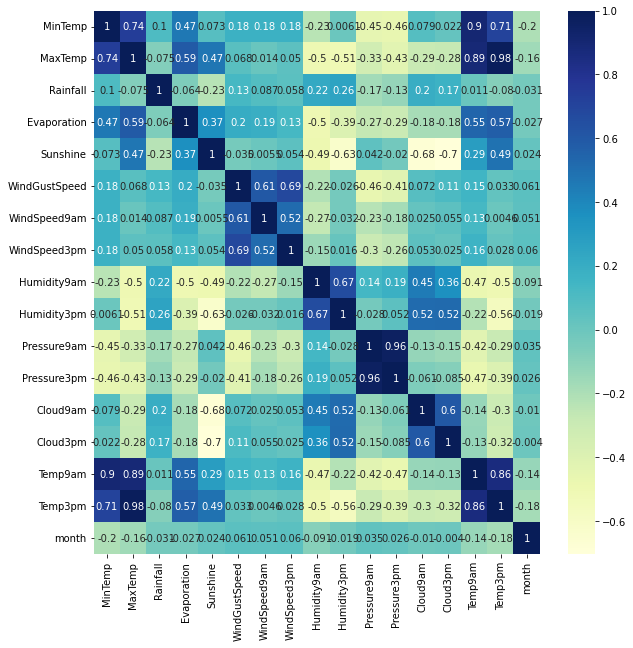

In [134]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

 #### Remove rows with at least one missing value for each of them.

In [135]:
df = df.dropna()

In [136]:
df.tail()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,month
142298,19.3,33.4,0.0,6.0,11.0,35.0,9.0,20.0,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,No,No,6
142299,21.2,32.6,0.0,7.6,8.6,37.0,13.0,11.0,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No,No,6
142300,20.7,32.8,0.0,5.6,11.0,33.0,17.0,11.0,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No,No,6
142301,19.5,31.8,0.0,6.2,10.6,26.0,9.0,17.0,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,No,No,6
142302,20.2,31.7,0.0,5.6,10.7,30.0,15.0,7.0,73.0,32.0,1013.9,1009.7,6.0,5.0,25.4,31.0,No,No,6


In [137]:
convert_yn = {'No': 0, 'Yes': 1}
df['RainToday'] = df['RainToday'].map(convert_yn)
df['RainTomorrow'] = df['RainTomorrow'].map(convert_yn)

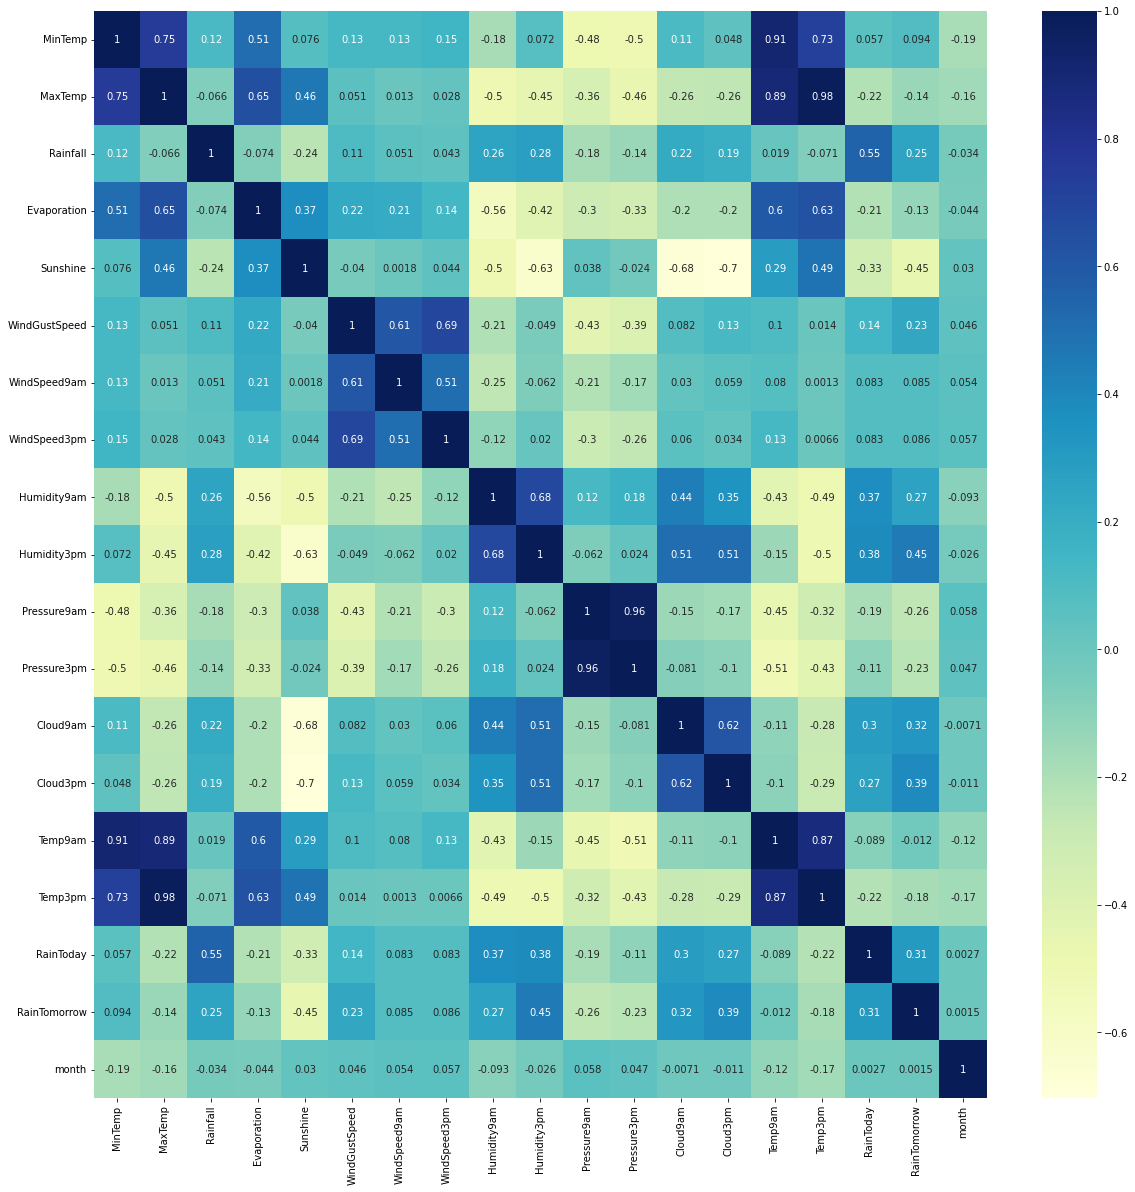

In [138]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [139]:
Y = df['RainTomorrow'].values
X = df.drop(['RainTomorrow'], axis = 1)

In [140]:
Y_org = df['RainTomorrow'].values
X_org = df.drop(['RainTomorrow'], axis = 1)

### Q2. Calculate the Variance Inflation Factor (VIF) value. VIF is a number that determines whether a variable has multicollinearity or not (starts from 1, and it has no upper limit. If the number gets larger, it means the variable has huge multicollinearity on it.). 


In [141]:
vif_df = pd.DataFrame()
vif_df['Feature'] = X.columns
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_df

,Feature,VIF
0,MinTemp,59.035134
1,MaxTemp,609.813618
2,Rainfall,1.625592
3,Evaporation,7.173636
4,Sunshine,17.420831
5,WindGustSpeed,26.669608
6,WindSpeed9am,7.789250
7,WindSpeed3pm,13.507975
8,Humidity9am,61.630762
9,Humidity3pm,48.169878


### Q3. Remove multicollinearities by creating new features. Find the features that have paired values and create the new feature which is the difference value between those pairs.


In [142]:
X['9to3_Humidity'] = -(X['Humidity9am'] - X['Humidity3pm'])
X = X.drop(columns = ['Humidity9am', 'Humidity3pm'])
X['9to3_WindSpeed'] = (X['WindSpeed9am'] - X['WindSpeed3pm'])
X = X.drop(columns = ['WindSpeed9am', 'WindSpeed3pm'])
X['9to3_Cloud'] = -(X['Cloud9am'] - X['Cloud3pm'])
X = X.drop(columns = ['Cloud9am', 'Cloud3pm'])
X['Range_Temp'] = X['MaxTemp'] - X['MinTemp']
X = X.drop(columns = ['MaxTemp', 'MinTemp'])
X['9to3_Pressure'] = -(X['Pressure9am'] - X['Pressure3pm'])
X = X.drop(columns = ['Pressure9am', 'Pressure3pm'])
X['9to3_Temp'] = -(X['Temp9am'] - X['Temp3pm'])
X = X.drop(columns = ['Temp9am', 'Temp3pm'])

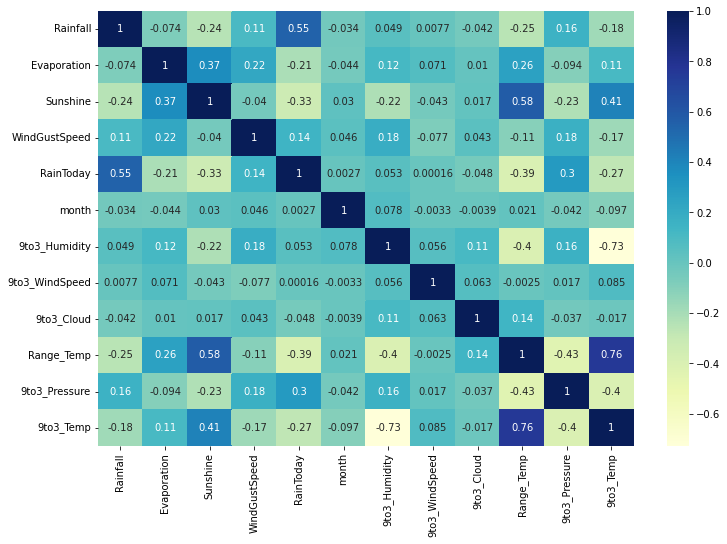

In [143]:
plt.figure(figsize = (12,8))
sns.heatmap(X.corr(), cmap="YlGnBu", annot = True)
plt.show()

Since Still MultiCollinearity is Observed as seen in correlation heatmap we go for more feature engineering so that we can reduce it.

In [144]:
X['Avg_Range_Temp'] = (X['9to3_Temp'] + X['Range_Temp'])/2
X = X.drop(columns = ['Range_Temp', '9to3_Temp'])
X['Speed_Gust_vs_Range'] = (1/X['WindGustSpeed'])*(X['9to3_WindSpeed'])
X = X.drop(columns = ['WindGustSpeed', '9to3_WindSpeed'])

In [145]:
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data

,Feature,VIF
0,Rainfall,1.588500
1,Evaporation,3.760753
2,Sunshine,7.989949
3,RainToday,1.860484
4,month,3.409642
5,9to3_Humidity,3.829448
6,9to3_Cloud,1.056813
7,9to3_Pressure,3.405682
8,Avg_Range_Temp,12.780647
9,Speed_Gust_vs_Range,1.284123


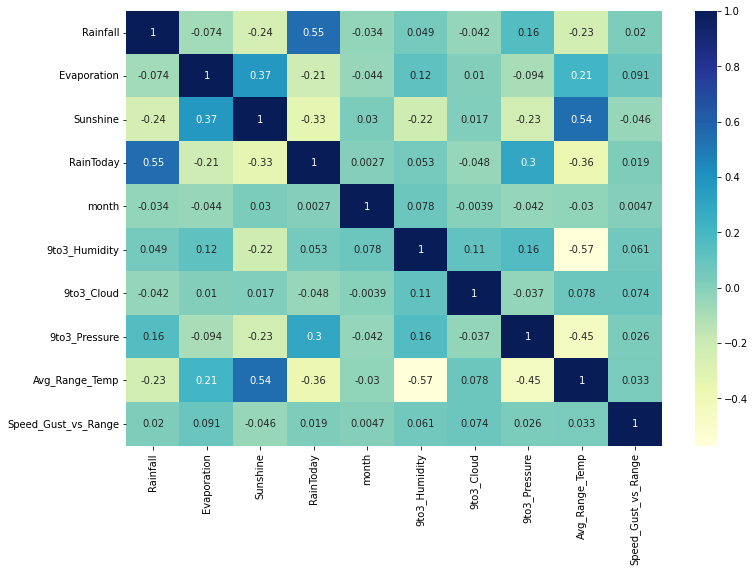

In [146]:
plt.figure(figsize = (12,8))
sns.heatmap(X.corr(), cmap="YlGnBu", annot = True)
plt.show()

### Q4. Remove features that have a VIF value above 5.

In [147]:
X = X.drop(columns = list(vif_data[vif_data['VIF'] > 5]['Feature']))

### Q5. Build a regression model to perform the Rain prediction. Also, tabulate accuracy of the prediction models, before and VIF computation.


#### Before VIF Computation

In [148]:
X_train, X_test, Y_train, Y_test = train_test_split(X_org,Y_org, test_size=0.2, random_state = 42)

In [149]:
scaler = StandardScaler()
X_train_new = scaler.fit_transform(X_train)
X_test_new = scaler.transform(X_test)

In [150]:
cls = LogisticRegression(solver='lbfgs', max_iter=1000)
cls.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [151]:
test_pred = cls.predict(X_test)

print("Accuracy of the model: ",accuracy_score(test_pred, Y_test))

Accuracy of the model:  0.8450679979342399


#### After VIF Computation

In [152]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state = 42)

In [153]:
scaler = StandardScaler()
X_train_new = scaler.fit_transform(X_train)
X_test_new = scaler.transform(X_test)

In [154]:
cls = LogisticRegression()
cls.fit(X_train, Y_train)

LogisticRegression()

In [155]:
test_pred = cls.predict(X_test)

print("Accuracy of the model: ",accuracy_score(test_pred, Y_test))

Accuracy of the model:  0.8087450507832673


Accuracy of the model before VIF Computation > after VIF Computation.